In [1]:
import pandas as pd
import glob
txtfiles = []
for file in glob.glob("/Users/jaeheukjung/Documents/Stocks/*.txt"):
    txtfiles.append(file)

In [2]:
import os
import glob
import pandas as pd
os.chdir("/Users/jaeheukjung/Documents/Stocks")

In [3]:
all_filenames = [i for i in glob.glob('*.{}'.format('txt'))]

In [4]:
list_of_df = []

In [5]:
len(all_filenames)

7194

In [6]:
test_df = pd.read_csv(all_filenames[0])
test_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,12.868,12.982,12.834,12.834,15928,0
1,2005-02-28,13.536,13.536,13.273,13.281,16382,0
2,2005-03-01,13.185,13.299,13.185,13.299,1250,0
3,2005-03-02,13.361,13.395,13.273,13.291,8760,0
4,2005-03-03,13.361,13.404,12.966,13.218,9897,0


In [7]:
def create_df (i):
    my_df = pd.read_csv(all_filenames[i])
    list_of_df.append(my_df)

In [8]:
nanlist = [137,1077, 1150,1905, 2089,2163, 2448, 2507, 2841, 2896, 2977,3196,3345, 3418, 3795, 3979, 4134, 4374, 4459, 4665, 4896, 5334,5839, 5964,6240,6296,6650,6755,6828,7078,7128]

In [9]:
for i in range(0, len(all_filenames)):
    if(i not in nanlist):
        create_df(i)

In [10]:
len(nanlist)

31

In [11]:
len(list_of_df)

7163

In [12]:
sorteddflist= sorted(list_of_df,key=lambda x:x["Volume"].max(axis=0))

In [13]:
len(sorteddflist)

7163

In [14]:
general_companies = sorteddflist[2000:6162]

In [15]:
companies_of_interest = sorteddflist[6163:7163]

In [16]:
companies_of_interest.sort(key=len)

In [17]:
general_companies.sort(key=len)

In [18]:
general_companies = general_companies[1000:4161]

In [19]:
companies_of_interest = companies_of_interest[100:999]

In [20]:
history = []
volume_mean =[]

In [21]:
volume = []

In [30]:
change_list = []

In [23]:
def plot_change(x):
    df = general_companies[x]
    change=0
    for i,j in df.iterrows():
        if (j[1]!=0):
            change = (j[4]-j[1])/j[1]
            change_list.append(change)

In [31]:
for i in range(0, len(companies_of_interest)):
    if(i%100==0):
        print(i)
    plot_change(i)

0
100
200
300
400
500
600
700
800


In [32]:
for i in range(0, len(change_list)):
    change_list[i]= change_list[i]/100

In [33]:
len(change_list)

1196877

In [34]:
count_p=0
count_n=0
for i in change_list:
    if(i>5):
        count_p = count_p+1
    if(i<-5):
        print(i)
        count_n = count_n+1
print(count_p)
print(count_n)

0
0


In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(change_list, bins =100, range=(-.5, .5))
plt.xlabel('Change in percentage')
plt.ylabel('dates')
plt.title('Change rates')
plt.savefig('change graph')

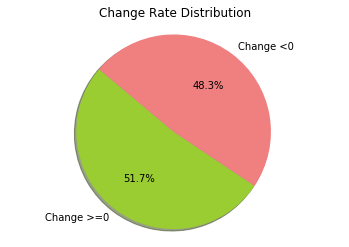

In [328]:
labels = 'Change >=0', 'Change <0'
sizes = [621212,579763]
colors = ['yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Change Rate Distribution')

plt.axis('equal')
plt.show()

In [39]:
def plot_history(x):
    df = general_companies[x]
    sum=0
    for i,j in df.iterrows():
        sum = sum+j[5]
    
    s_hist.append(len(df))
    s_vol.append(sum/len(df))

In [41]:
b_hist =[]
s_hist =[]
s_vol =[]
b_vol =[]

In [42]:
for i in range(0, len(list_of_df)):
    plot_history(i)

IndexError: list index out of range

In [37]:
len(volume_mean)

0

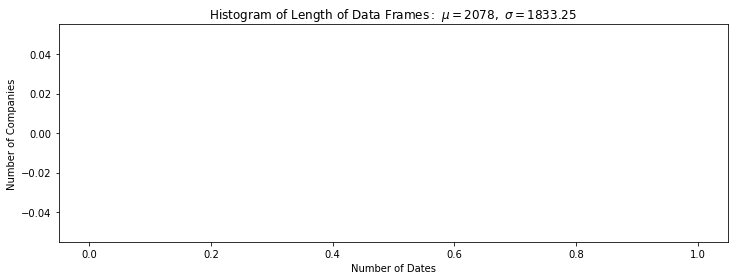

In [38]:
plt.figure(figsize=(12,4))
plt.hist(history, bins=100)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frames:}\ \mu=2078,\ \sigma=1833.25$')
plt.savefig('all time')

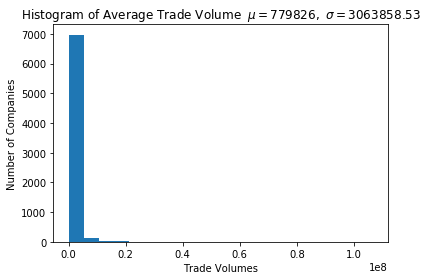

In [253]:
plt.figure(figsize=(6,4))
plt.hist(volume_mean, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\:}\ \mu=779826,\ \sigma=3063858.53$')
plt.savefig('all volume')

In [43]:
def big(x):
    df = companies_of_interest[x]
    print(x)
    sum=0
    for i,j in df.iterrows():
        sum = sum+j[5]
    
    b_hist.append(len(df))
    b_vol.append(sum/len(df))

In [44]:
for i in range(0,len(companies_of_interest)):
    big(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

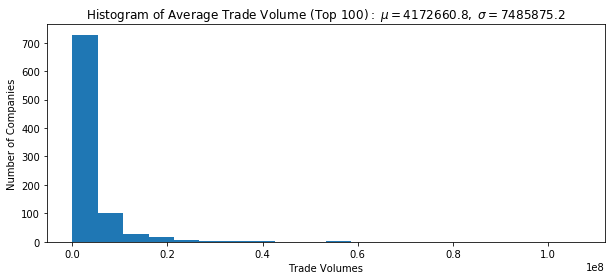

In [252]:
plt.figure(figsize=(10,4))
plt.hist(b_vol, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\ (Top\ 100):}\ \mu=4172660.8,\ \sigma=7485875.2$')
plt.savefig('top 100 volume_r')

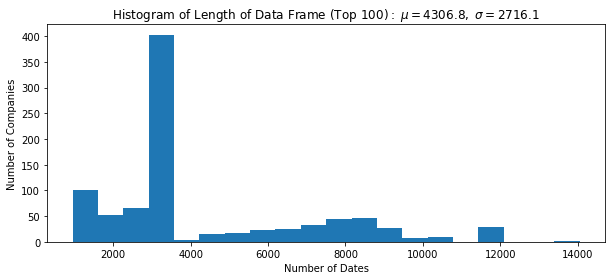

In [251]:
plt.figure(figsize=(10,4))
plt.hist(b_hist, bins=20)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frame\ (Top\ 100):}\ \mu=4306.8,\ \sigma=2716.1$')
plt.savefig('top 100 volume')

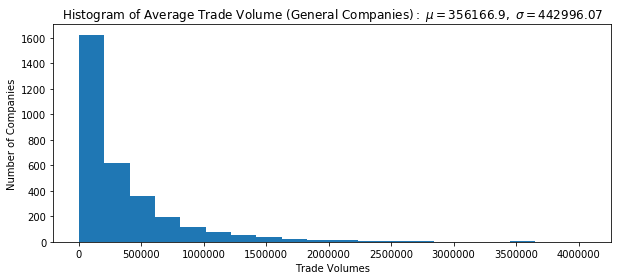

In [249]:
plt.figure(figsize=(10,4))
plt.hist(s_vol, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\ (General\ Companies):}\ \mu=356166.9,\ \sigma=442996.07$')
plt.savefig('general volume')

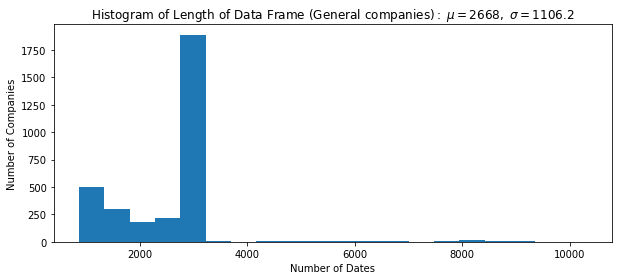

In [255]:
plt.figure(figsize=(10,4))
plt.hist(s_hist, bins=20)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frame\ (General\ companies):}\ \mu=2668,\ \sigma=1106.2$')
plt.savefig('general date')

In [222]:
import statistics as s
s.median(vo)

3175

In [248]:
s.mean(volume_mean)

779826.325805949

In [235]:
s.stdev(b_vol)

7485875.189914029

(array([6.497e+03, 3.590e+02, 1.170e+02, 6.500e+01, 3.600e+01, 1.600e+01,
        1.400e+01, 1.000e+01, 6.000e+00, 1.200e+01, 3.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.02976190e+01, 1.77740010e+06, 3.55475990e+06, 5.33211970e+06,
        7.10947950e+06, 8.88683930e+06, 1.06641991e+07, 1.24415589e+07,
        1.42189187e+07, 1.59962785e+07, 1.77736383e+07, 1.95509981e+07,
        2.13283579e+07, 2.31057177e+07, 2.

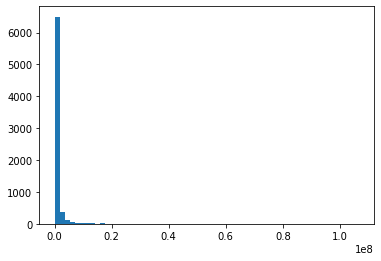

In [121]:
plt.hist(volume_mean, bins = 60)

In [51]:
classification = {}

In [148]:
zipped = tuple(zipped)

In [159]:
import numpy as np
zipped = np.array(zipped)

In [329]:
from scipy import stats 
stats.describe(change_list)

DescribeResult(nobs=1200975, minmax=(-42.08860759493671, 80.48780487804879), mean=0.0004080965118436734, variance=0.04430735114475457, skewness=77.8766796101842, kurtosis=36384.9145119549)

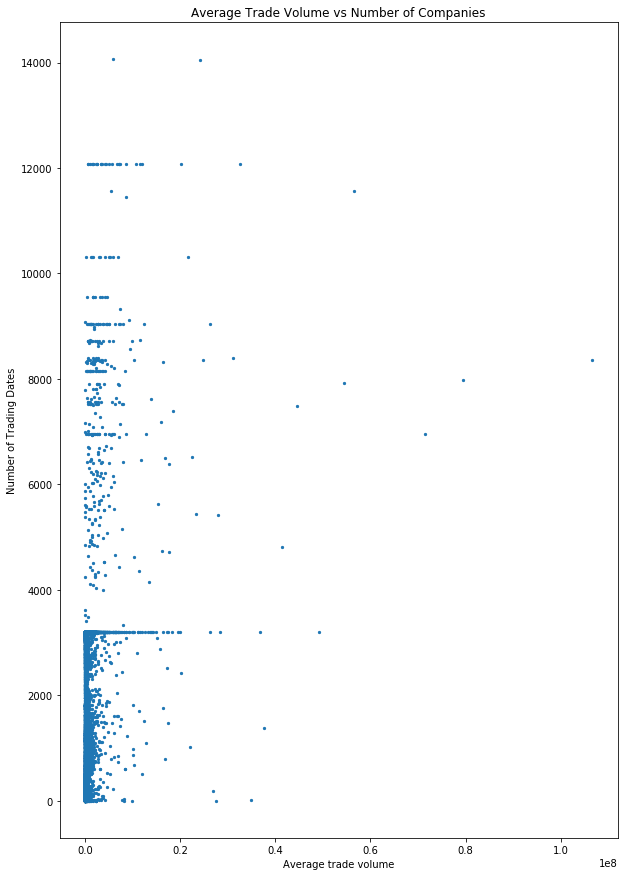

In [296]:
plt.figure(figsize=(10,15))
plt.scatter(volume_mean, history, s=5)
plt.xlabel('Average trade volume')
plt.ylabel('Number of Trading Dates')
plt.title('Average Trade Volume vs Number of Companies')
plt.savefig('overall scatter')

[[2.01156814e+03 4.52918221e+05]
 [5.71745455e+03 5.57100229e+07]
 [4.76652201e+03 1.13574126e+07]]


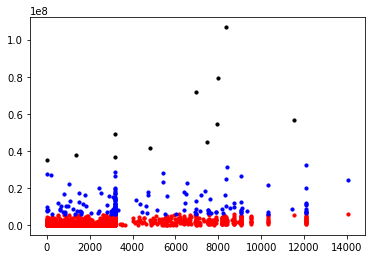

In [164]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(zipped)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(zipped)

plt.scatter(zipped[y_km ==0,0], zipped[y_km == 0,1], s=10, c='red')
plt.scatter(zipped[y_km ==1,0], zipped[y_km == 1,1], s=10, c='black')
plt.scatter(zipped[y_km ==2,0], zipped[y_km == 2,1], s=10, c='blue')


In [45]:
def relativity (x,y):
    df= companies_of_interest[x]
    df1= general_companies[y]
    changelist = []
    changelist_1 = []
    positive = 0
    negative = 0
    countpos = 0
    countneg = 0
    
    if(len(df1)>200):
        for i, j in df.iterrows():
            if(j[1]!=0):
                change = (j[4]-j[1])/j[1]
                changelist.append((j[0], change))
        for i, j in df1.iterrows():
            if(j[1]!=0):
                change1 = (j[4]-j[1])/j[1]
                changelist_1.append((j[0], change1))
    
        for c in changelist:
            date, change = c
            for c1 in changelist_1:
                date1, change1 = c1
                if(date == date1):
                    if((change >0) & (change1>0)):
                        classification.update({date:1})
                        positive= positive+compare(change,change1)
                        countpos= countpos+1
                    if((change <0) & (change1<0)):
                        classification.update({date:1})
                        positive= positive+compare(change,change1)
                        countpos= countpos+1
                    if((change>0) & (change1<0)):
                        classification.update({date:-1})
                        negative= negative-compare(change,change1)
                        countneg = countneg+1
                    if((change<0) & (change1>0)):
                        classification.update({date:-1})
                        negative= negative-compare(change,change1)
                        countneg = countneg+1
        if((positive/negative)>1.30):
            correlated_companies.append([x,y])
        if((positive/negative)<.7):
            correlated_companies.append([x,y])
        if(negative!=0):
            return (positive/negative)
        else: 
            return 0
    else: 
        return 0

In [46]:
correlated_companies = []

In [47]:
def compare(x,y):
    if(x>y):
        if(x!=0):
            return y/x
        if(x==0):
            return 0
    if(y>x):
        if(y!=0):
            return x/y
        if(y==0):
            return 0
    if(x==y):
        return 1

In [52]:
import random
count = 0
for i in range(0,7):
    x= random.randint(0,200)
    count= count+1
    print(count)
    for j in range(0, 150):
        y= random.randint(0,1000)
        relativity(x,y)

1
2
3
4
5
6
7


In [53]:
len(correlated_companies)

326

In [55]:
count = 0
x = []
for i in range(0, len(correlated_companies)):
    if(i<len(correlated_companies)-1):
        if (correlated_companies[i][0]==correlated_companies[i+1][0]):
            count = count+1
        elif(correlated_companies[i][0]!=correlated_companies[i+1][0]):
            company = correlated_companies[i][0]
            number = count
            x.append(company)
            x.append(count)
            print(x)
            count = 0
            x.clear()
    else:
        company = correlated_companies[i][0]
        number = count
        x.append(company)
        x.append(count)
        print(x)


[157, 20]
[107, 57]
[109, 28]
[161, 41]
[87, 50]
[57, 67]
[179, 56]


In [56]:
import matplotlib.pyplot as plt
def plot (x,y):
    df= x
    df1=y
    closelist = []
    closelist_1 = []
    for i, j in df.iterrows(): 
        close = j[4]
        closelist.append(close)
    for i, j in df1.iterrows():
        close1 = j[4]
        closelist_1.append(close1)
    plt.plot(range(0,len(closelist)), closelist)
    plt.plot(range(0,len(closelist_1)), closelist_1)

In [99]:
list_attributes = []
attributes = []
for i in correlated_companies:
    list_attributes = i
    if(list_attributes[0]==87):
        attributes.append(list_attributes[1])

In [100]:
attributes.sort(reverse=True)

In [101]:
attributes = attributes[0: 20]

In [102]:
dates = []
attribute_dates =[]
all_dates = []
df_new = companies_of_interest[87]
for i,j in df_new.iterrows():
    dates.append(j[0])

for x in attributes:
    temp_dates =[]
    for i,j in general_companies[x].iterrows():
        temp_dates.append(j[0])
        all_dates.append(j[0])
    attribute_dates.append(temp_dates)

In [103]:
for x in dates:
    if (x not in all_dates):
        dates.remove(x)

In [104]:
a_dates =[]
for x in attribute_dates:
    a_dates = x
    for y in x:
        if(y not in dates):
            x.remove(y)

In [105]:
attribute_dates.sort(key=len)

In [106]:
get_classification = []

In [108]:
for i in attributes:
    len_list.append(len(general_companies[i]))

In [109]:
len_list = []

In [110]:
get_classification=[]

In [111]:
def classification_data(x):
    changelist = []
    df = companies_of_interest[x]
    for i, j in df.iterrows():
        if(j[0] in dates):
            if(j[1]!=0):
                change = (j[4]-j[1])/j[1]
                if( change>=0):
                    get_classification.append(1)
                if(change<0):
                    get_classification.append(0)

In [112]:
classification_data(87)

In [113]:
def get_changerate (x):
    temp_list_of_dicts[:]=[]
    get_change = []
    get_dates = []
    df = general_companies[x]
    for i, j in df.iterrows():
         get_dates.append(j[0])
    for date in dates:
        if(date in get_dates):
            Open = df.loc[df['Date']==date]['Open'].values
            open = Open[0]
            Close = df.loc[df['Date']==date]['Close'].values
            close = Close[0]
            change = ((close-open)/open)
            temp_list_of_dicts.append(change)
        else : 
            temp_list_of_dicts.append(0)
        
    return temp_list_of_dicts
                #if in the bigger date list, get the change rate in. if in the bigger list but not here, put 0.
                #if in the smaller list, but not in bigger list, no value.

In [114]:
temp_list_of_dicts=[]

In [115]:
for i in range(0, len(attributes)):
    get_changerate(i)

In [116]:
attributes

[987,
 983,
 977,
 973,
 933,
 920,
 829,
 829,
 794,
 761,
 758,
 713,
 677,
 677,
 665,
 644,
 587,
 585,
 585,
 555]

In [ ]:
dates

In [117]:
dataframe = pd.DataFrame(columns = attributes, index = dates)

In [ ]:
dataframe.head(20)

In [122]:
def insert_into_df (x):
    dataframe[x]=get_changerate(x)

In [123]:
for i in attributes:
    print(i)
    insert_into_df(i)

987
983
977
973
933
920
829
829
794
761
758
713
677
677
665
644
587
585
585
555


In [125]:
dataframe

,987,983,977,973,933,920,829,829,794,761,758,713,677,677,665,644,587,585,585,555
2011-11-07,-0.004176,0.116071,-0.028739,0.012658,0.024346,-0.002722,0.002030,0.002030,0.001047,0.023629,0.036432,-0.007059,0.000000,0.000000,-0.014228,0.029851,0.000000,0.000000,0.000000,0.000000
2011-11-08,0.006204,0.083333,0.000000,-0.025424,-0.016439,0.002666,0.003847,0.003847,-0.004014,-0.006369,0.023643,0.013387,0.000000,0.000000,-0.038283,0.044776,0.000000,0.000000,0.000000,0.000000
2011-11-09,-0.030246,-0.015152,-0.008975,0.034783,-0.005968,-0.018579,-0.013185,-0.013185,-0.004474,0.004209,-0.049224,-0.009124,0.000000,0.000000,-0.045074,-0.057143,0.000000,0.000000,0.000000,0.000000
2011-11-10,-0.016578,-0.069231,-0.035723,0.008811,0.002233,-0.005344,-0.022855,-0.022855,-0.001541,0.001324,0.008801,0.037737,0.000000,0.000000,-0.045732,-0.058824,0.000000,0.000000,0.000000,0.000000
2011-11-11,0.014004,0.049587,-0.038746,0.035088,-0.002919,0.055575,0.002628,0.002628,0.011004,0.001327,0.002646,-0.019622,0.000000,0.000000,-0.076306,-0.238095,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-06,-0.033865,-0.005263,0.007519,-0.041868,0.007576,0.021220,0.001254,0.001254,0.002562,0.001652,0.000638,0.006262,-0.010000,-0.010000,0.041594,0.018987,0.027322,-0.004152,-0.004152,-0.003834
2017-11-07,0.036885,0.005319,-0.007194,-0.054772,-0.009774,-0.005181,0.000419,0.000419,-0.000547,0.007573,-0.008940,-0.013986,-0.076923,-0.076923,0.008578,-0.024691,0.074074,-0.018627,-0.018627,-0.003079
2017-11-08,-0.011834,-0.042553,-0.029197,-0.036713,0.022848,-0.015544,0.000000,0.000000,0.005117,0.011106,-0.001297,0.072170,-0.194444,-0.194444,0.001420,-0.087500,-0.034826,0.010250,0.010250,0.012346
2017-11-09,0.046465,0.011628,0.000000,-0.016319,-0.006721,-0.015000,-0.006771,-0.006771,0.000000,0.000000,-0.018229,-0.030885,0.027211,0.027211,0.005001,0.000000,-0.093264,-0.014905,-0.014905,-0.008397


In [124]:
attributes.remove(677)

In [126]:
dataframe.insert(20,'classification',0)

In [127]:
dataframe['classification']=get_classification

In [128]:
dataframe_reduced = dataframe.drop(dataframe.index[0:1000])

In [129]:
dataframe_reduced.head()

,987,983,977,973,933,920,829,829,794,761,...,713,677,677,665,644,587,585,585,555,classification
2015-10-29,-0.057792,0.008361,-0.002792,0.000000,0.083333,0.000000,-0.002160,-0.002160,-0.000394,0.001239,...,0.014267,-0.006452,-0.006452,0.027929,-0.008658,0.034414,-0.007302,-0.007302,-0.008567,0
2015-10-30,0.025289,0.113043,0.000000,0.004732,0.046667,-0.003955,0.008257,0.008257,0.001182,0.010363,...,0.046187,-0.133739,-0.133739,-0.006686,-0.030973,-0.025575,-0.022659,-0.022659,-0.008703,1
2015-11-02,0.051276,0.016393,0.008494,0.006289,-0.006260,0.028121,0.001292,0.001292,-0.000394,-0.016434,...,0.006398,0.104809,0.104809,0.027002,0.059361,0.003934,0.007731,0.007731,0.007996,1
2015-11-03,-0.031501,0.017600,-0.022209,0.001565,0.042520,-0.007878,-0.007299,-0.007299,0.001575,0.003700,...,0.008681,0.101083,0.101083,0.020780,-0.021834,0.019443,-0.016874,-0.016874,0.007771,1
2015-11-04,-0.003237,0.067633,-0.019819,-0.006250,-0.016467,0.005979,-0.004290,-0.004290,0.004326,-0.014596,...,-0.014037,0.059233,0.059233,-0.005277,-0.008811,0.003750,0.025200,0.025200,0.001331,1


In [130]:
X = dataframe_reduced.iloc[:, 1:20]
y = dataframe_reduced.iloc[:, 20]

In [131]:
X = X.values
y = y.values

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [133]:
import keras

Using TensorFlow backend.


In [134]:
from keras.models import Sequential
from keras.layers import Dense

In [145]:
classifier = Sequential()

In [146]:
classifier.add(Dense(activation = 'relu', input_dim = 19, units = 10, kernel_initializer = 'uniform'))

In [147]:
classifier.add(Dense(activation = 'relu', units = 15, kernel_initializer = 'uniform'))

In [148]:
classifier.add(Dense(activation = 'relu', units = 12, kernel_initializer = 'uniform'))

In [149]:
classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [150]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/200
411/411 [==============================] - 0s 497us/step - loss: 0.6932 - accuracy: 0.5182
Epoch 2/200
411/411 [==============================] - 0s 140us/step - loss: 0.6927 - accuracy: 0.5328
Epoch 3/200
411/411 [==============================] - 0s 121us/step - loss: 0.6925 - accuracy: 0.5328
Epoch 4/200
411/411 [==============================] - 0s 111us/step - loss: 0.6923 - accuracy: 0.5328
Epoch 5/200
411/411 [==============================] - 0s 111us/step - loss: 0.6921 - accuracy: 0.5328
Epoch 6/200
411/411 [==============================] - 0s 110us/step - loss: 0.6919 - accuracy: 0.5328
Epoch 7/200
411/411 [==============================] - 0s 118us/step - loss: 0.6918 - accuracy: 0.5328
Epoch 8/200
411/411 [==============================] - 0s 108us/step - loss: 0.6916 - accuracy: 0.5328
Epoch 9/200
411/411 [==============================] - 0s 110us/step - loss: 0.6916 - accuracy: 0.5328
Epoch 10/200
411/411 [==============================] - 0s 110us/step - l

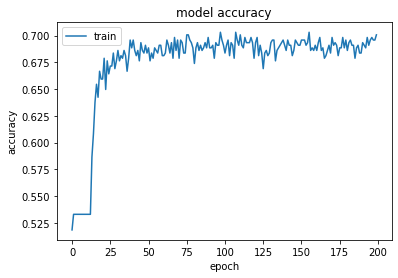

In [151]:
history = classifier.fit(X_train, y_train, epochs=200, batch_size=10)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [152]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=15)

In [155]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[27 16]
 [20 40]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        43
           1       0.71      0.67      0.69        60

    accuracy                           0.65       103
   macro avg       0.64      0.65      0.64       103
weighted avg       0.66      0.65      0.65       103



=== All AUC Scores ===
[0.54285714 0.62857143 0.71428571 0.71428571 0.65714286 0.6
 0.62857143 0.54285714 0.6        0.44117647 0.51515152 0.63636364
 0.57575758 0.48484848 0.36363636]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5763670316611493
